# **PERBANDINGAN PENDAPATAN GAME MOBILE PERTAHUN SEJAK PERILISAN GAME MENGGUNAKAN METODE CLUSTERING K-MEANS**

# **Disusun Oleh :**

Nama : Hikmal Rifqi Perdana

NIM : A11.2022.14630

Kelas : Pembelajaran Mesin A11.4410

# **Ringkasan**

Penelitian ini bertujuan untuk menganalisis pendapatan game mobile pertahun sejak perilisan menggunakan metode clustering K-Means. Pertumbuhan industri game mobile telah mencapai tingkat signifikan, namun sedikit penelitian yang secara sistematis menganalisis pendapatan game sejak perilisan hingga beberapa tahun ke depan. Metode clustering K-Means dipilih karena kemampuannya dalam mengelompokkan data ke dalam kelompok-kelompok yang memiliki karakteristik serupa.

Penelitian ini akan menggunakan data pendapatan game dari beberapa tahun setelah perilisan yang minimal pendapatan kotornya sebesar 100 miliar dollar/USD, dengan melibatkan sejumlah game mobile terpopuler. Data yang digunakan akan meliputi pendapatan tahunan dan total pendapatan hingga sekarang. Metode clustering K-Means akan diterapkan untuk mengelompokkan game-game berdasarkan pola pendapatan mereka dari tahun ke tahun setelah perilisan.

Analisis yang dilakukan akan memberikan pemahaman yang lebih baik tentang pola
pendapatan game mobile sejak perilisan, memungkinkan pengembang game untuk membuat
strategi yang lebih efektif dalam mengelola dan memonetisasi game mereka. Hasil dari
penelitian ini diharapkan dapat memberikan wawasan yang berharga bagi industri game.

# **Masalah dan Tujuan**

Saat ini pemahaman tentang pola pendapatan game mobile dari tahun ke tahun sejak perilisan masih terbatas. Kurangnya analisis yang sistematis tentang bagaimana pendapatan game berkembang dari waktu ke waktu menghambat kemampuan pengembang dan untuk membuat keputusan yang efektif terkait dengan monetisasi dan pengelolaan game.

Kemudian topik yang saya angkat kali ini sudah ada yang membuatnya jadi itu membuat saya sebisa mungkin membuat penelitian ini lebih baik. Untuk dataset juga bukan dataset private melainkan dataset public yang didapat dari Kaggle.

Tujuan penelitian ini adalah memanfaatkan sebisa mungkin machine learning dengan metode K-Means untuk menyelesaikan permasalahan pola pendapatan game mobile dari tahun ke tahun sejak perilisan.

# **Alur Penyelesaian**

Berikut bagan penyelesaian penelitian ini :

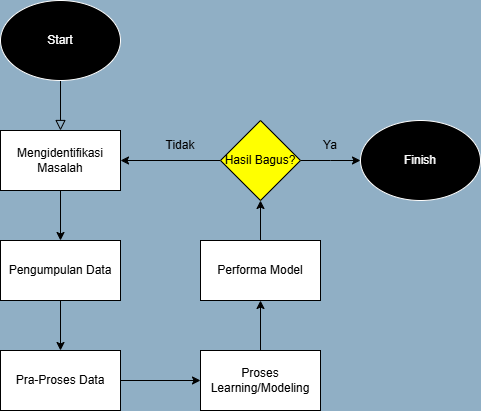

# **Mengimport Library - Library Yang Akan Digunakan**


*   pandas = untuk manipulasi dan analisis data.
*   matplotlib = untuk visualisasi data.
*   datetime = Untuk pengolahan terhadap tanggal dan waktu
*   sklearn.preprocessing = untuk standarisasi data sebelum melakukan training model.
*   sklearn.cluster = untuk algoritma clustering.
*   sklearn.metrics = untuk mengevaluasi performa model machine learning.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Deskripsi library

# **Penjelasan Dataset**

Dataset ini merupakan kumpulan data pendapatan game mobile yang minimal telah
mendapatkan pendapatan kotor sebesar 100 miliar dollar/USD. Data ini meliputi kolom Game, Revenue (Pendapatan), Initial release (Perilisan Pertama), Publisher(s) (Penerbit), Genre(s) terdiri dari 104 baris dan 5 kolom. Dataset ini bernama mobile-games-revenue.csv dan sumber dari dataset ini berasal dari Kaggle yang berarti bersifat public dataset.

# **Exploratory Data Analysis (EDA)**

# **1. Memuat/Memanggil Dataset**

Memuat/Memanggil Dataset Yang Akan Digunakan Untuk Penelitian Ini Yaitu 'mobile-games-revenue.csv'.

In [ ]:
df = pd.read_csv('mobile-games-revenue.csv')
# Memanggil Dataset

# **2. Deskripsi Dataset**

Melihat Isi Dataset Yang Sebelumnya Dimuat.

In [ ]:
df
# Deskripsi Dataset

,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy
...,...,...,...,...,...
99,Yahtzee With Buddies,113000000,2017-11-01,Scopely,Yahtzee
100,Dragon Quest Tact,111990000,2020-07-16,Square Enix,Tactical RPG
101,Fallout Shelter,100000000,2015-06-14,Bethesda Softworks,Simulation (CMS)
102,Mafia City,100000000,2017-07-25,Yotta Games,RPG


# **3. Deskripsi Atribut Dalam Dataset**

Melihat Atribut Pada Dataset.

In [ ]:
df.dtypes

Game               object
Revenue             int64
Initial release    object
Publisher(s)       object
Genre(s)           object
dtype: object

# **4. Menampilkan 20 Baris Awal Dataset**

Melihat 20 Baris Awal Dataset.

In [ ]:
df.head(20)

,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy
5,Pokémon Go,7760000000,2016-07-06,Niantic / The Pokémon Company,Augmented reality
6,Candy Crush Saga,7456000000,2012-11-14,King (Activision Blizzard),Puzzle
7,Fate/Grand Order,6300000000,2015-07-30,Aniplex (Sony Music Entertainment Japan),RPG
8,Fantasy Westward Journey,4700000000,2015-03-26,NetEase,MMORPG
9,Garena Free Fire,4330000000,2017-12-04,Garena,Battle royale


# **5. Menampilkan Pendapatan Game Tertinggi**

Melihat Pendapatan Game Tertinggi.

In [ ]:
average_revenue = df['Revenue'].mean()

top_game = df.loc[df['Revenue'].idxmax(), 'Game']

print("Rata - Rata Pendapatan :", average_revenue)
print("Pendapatan Game Tertinggi :", top_game)
# Melihat pendapatan tertinggi

Rata - Rata Pendapatan : 1617105432.6923077
Pendapatan Game Tertinggi : Honor of Kings / Arena of Valor


# **6. Menampilkan Pendapatan Game Terendah**

Melihat Pendapatan Game Terendah.

In [ ]:
average_revenue = df['Revenue'].mean()

min_game = df.loc[df['Revenue'].idxmin(), 'Game']

print("Rata - Rata Pendapatan :", average_revenue)
print("Pendapatan Game Terendah :", min_game)
# Melihat pendapatan terendah

Rata - Rata Pendapatan : 1617105432.6923077
Pendapatan Game Terendah : Fallout Shelter


# **7. Menampilkan 20 Game Teratas**

Melihat 20 Game Teratas.

In [ ]:
df[['Game', 'Revenue']].head(20)
# 20 Game Teratas

,Game,Revenue
0,Honor of Kings / Arena of Valor,14667500000
1,Monster Strike,10000000000
2,PUBG Mobile,9000000000
3,Puzzle & Dragons,8578340000
4,Clash of Clans,8000000000
5,Pokémon Go,7760000000
6,Candy Crush Saga,7456000000
7,Fate/Grand Order,6300000000
8,Fantasy Westward Journey,4700000000
9,Garena Free Fire,4330000000


# **8. Menampilkan 20 Game Terbawah**

Melihat 20 Game Terbawah.

In [ ]:
df[['Game', 'Revenue']].tail(20)
# 20 Game Terbawah

,Game,Revenue
84,Empire & Puzzles,186000000
85,KartRider Rush+,169000000
86,Dragalia Lost,168000000
87,Perfect World Mobile,165000000
88,Three Kingdoms Fantasy Land,161600000
89,Candy Crush Jelly Saga,158000000
90,Jikkyō Powerful Pro Yakyū,155000000
91,Puzzles & Survival,151000000
92,Slotomania,149000000
93,NBA Live Mobile,140000000


# **9. Menampilkan 20 Game Teratas Menggunakan Pyplot**

Melihat 20 Game Teratas.

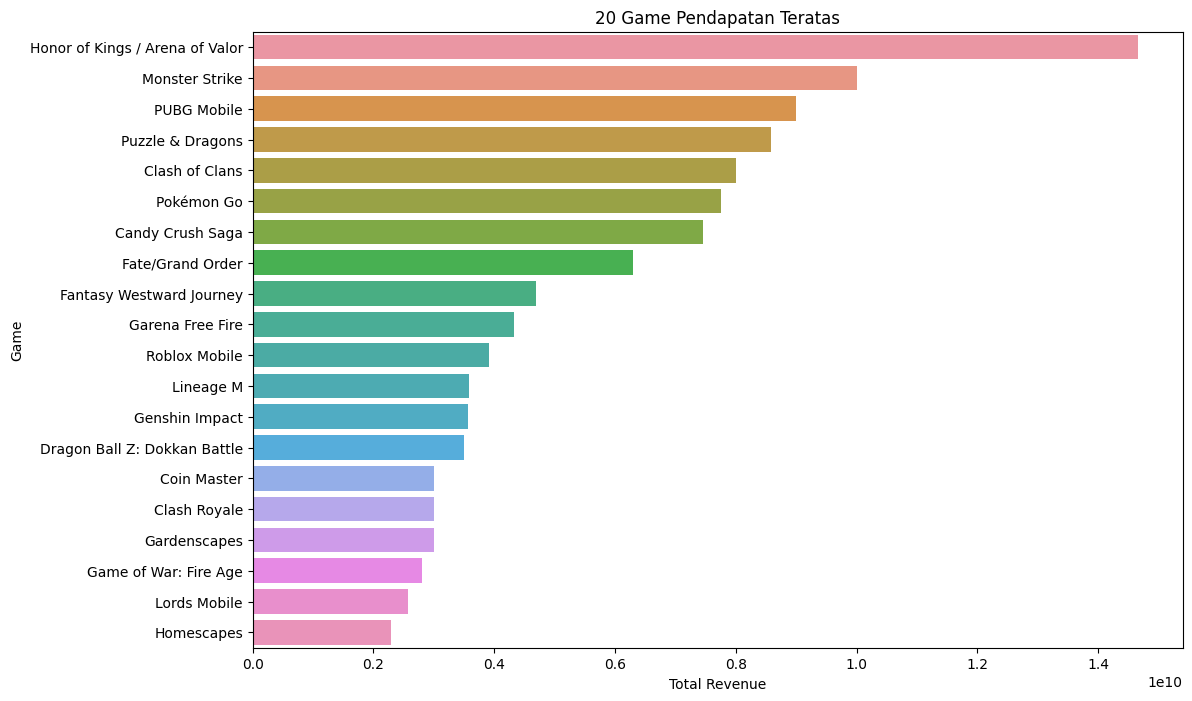

In [ ]:
# 20 Game Teratas
top_mobile_games = df.sort_values('Revenue', ascending=False).head(20)

#Bar Chart

plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Game', data=top_mobile_games)
plt.title('20 Game Pendapatan Teratas')
plt.xlabel('Total Revenue')
plt.ylabel('Game')
plt.show()

# **10. Menampilkan 20 Game Terbawah Menggunakan Pyplot**

Melihat 20 Game Terbawah.

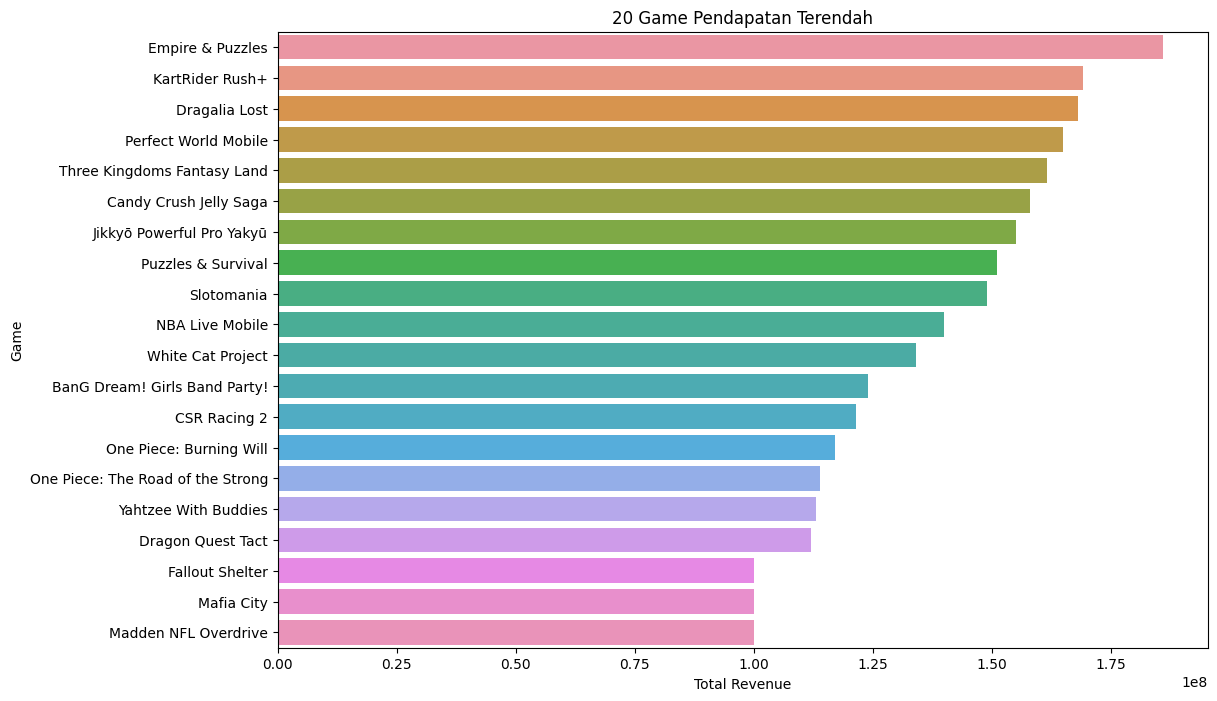

In [ ]:
# 20 Game Terbawah
min_mobile_games = df.sort_values('Revenue', ascending=False).tail(20)

#Bar Chart

plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Game', data=min_mobile_games)
plt.title('20 Game Pendapatan Terendah')
plt.xlabel('Total Revenue')
plt.ylabel('Game')
plt.show()

# **11. Mendeklarasi Objek**

Mendeklarasi Objek Initial release, Years Since Release, Normalized Revenue.

In [ ]:
# Menghubungkan Dengan Tanggal Saat Ini
df['Initial release'] = pd.to_datetime(df['Initial release'])
current_date = datetime.now()

# Menghitung Tahun Sejak Perilisan
df['Years Since Release'] = df['Initial release'].apply(lambda x: (current_date - x).days / 365)

# Pendapatan Pertahun
df['Normalized Revenue'] = df['Revenue'] / df['Years Since Release']

# **Proses Features Dataset**

# **12. Preprocessing Data**

Melakukan Preprocessing Data Sebelum Training Model.

In [ ]:
# Preprocessing data
# Mengambil kolom 'Years Since Release' dan 'Normalized Revenue' untuk clustering
X = df[['Years Since Release', 'Normalized Revenue']]

# **13. Standarisasi Data**

Melakukan Standarisasi Data Untuk Training Model.

In [ ]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Proses Learning / Modeling**

# **14. Menentukan Cluster Menggunakan Metode Elbow**

Menggunakan Metode Elbow Untuk Menentukan Jumlah Cluster Yang Optimal.

In [ ]:
# Menentukan jumlah cluster yang optimal menggunakan metode Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# **15. Visualisasi Cluster Menggunakan Metode Elbow**

Menggunakan Metode Elbow Untuk Menentukan Jumlah Cluster Yang Optimal.

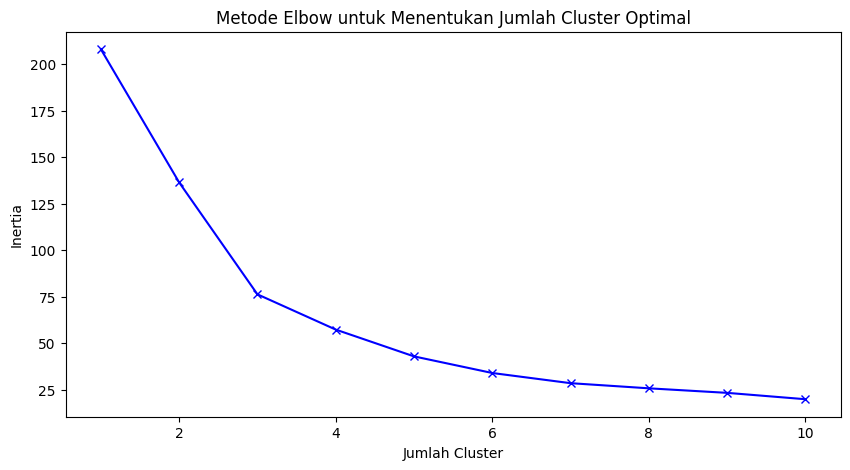

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# **16. Menentukan Cluster Menggunakan Silhouette Score**

Menggunakan Silhouette Score Untuk Menentukan Jumlah Cluster Yang Optimal.

In [ ]:
# Menentukan jumlah cluster yang optimal menggunakan Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# **17. Visualisasi Cluster Menggunakan Silhouette Score**

Menggunakan Silhouette Score Untuk Menentukan Jumlah Cluster Yang Optimal.

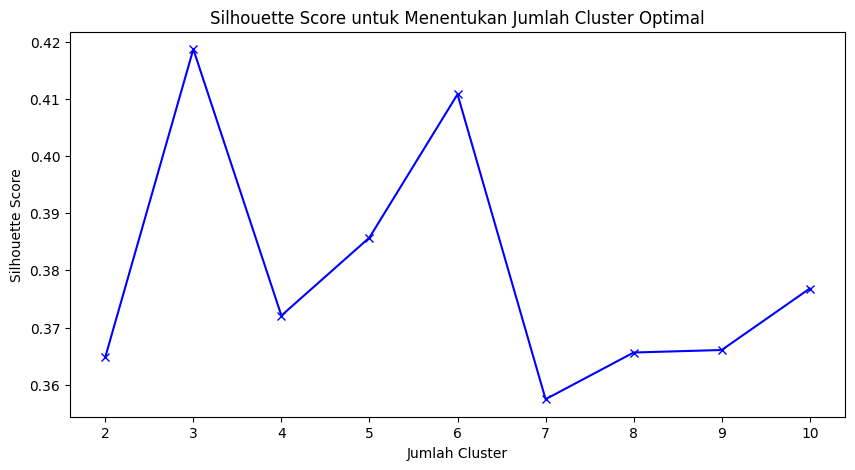

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# **18. Menerapkan K-Means Dengan Cluster 3**

Menggunakan K-Means Dengan Cluster yang Optimal Yaitu 3.

In [ ]:
# Menerapkan K-Means dengan jumlah cluster yang optimal yaitu 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# **19. Menambahkan Label Cluster Ke Dalam DataFrame**

Menambahkan Label Cluster Untuk K-Means.

In [ ]:
df['Cluster'] = kmeans.labels_

# **20. Visualisasi Hasil Clustering**

Mengvisualisasi Hasil Clustering.

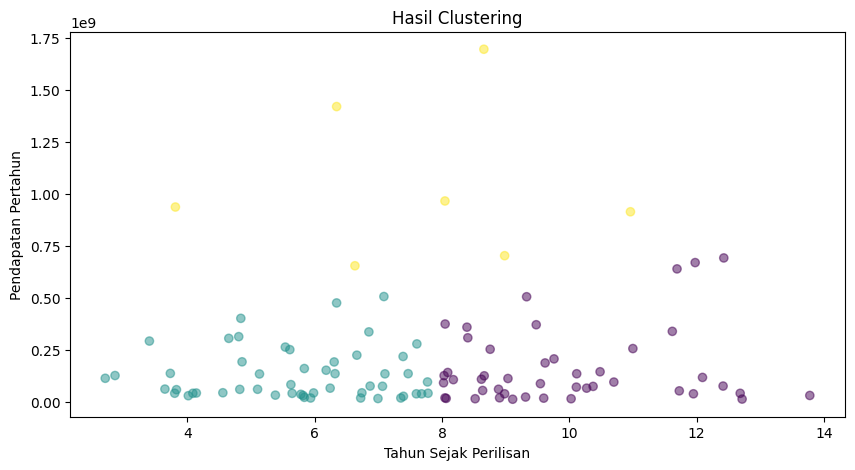

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Years Since Release'], df['Normalized Revenue'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Hasil Clustering')
plt.xlabel('Tahun Sejak Perilisan')
plt.ylabel('Pendapatan Pertahun')
plt.show()

# **21. Menampilkan Hasil Cluster**

Menampilkan Hasil 3 Cluster.

In [ ]:
# Menampilkan hasil cluster
print(df.head())

                              Game      Revenue Initial release  \
0  Honor of Kings / Arena of Valor  14667500000      2015-11-26   
1                   Monster Strike  10000000000      2013-08-08   
2                      PUBG Mobile   9000000000      2018-03-19   
3                 Puzzle & Dragons   8578340000      2012-02-20   
4                   Clash of Clans   8000000000      2012-08-02   

                          Publisher(s)                 Genre(s)  \
0                        Tencent Games                     MOBA   
1                                 Mixi  Puzzle / RPG / Strategy   
2  Tencent Games / Krafton / VNG Games            Battle royale   
3          GungHo Online Entertainment             RPG / Puzzle   
4                  Supercell (Tencent)                 Strategy   

   Years Since Release  Normalized Revenue  Cluster  
0             8.657534        1.694189e+09        2  
1            10.958904        9.125000e+08        2  
2             6.345205        1.

# **22. Performa Model**

Melihat Performa Model Inertia dan Silhouette Score.

In [ ]:
# Evaluasi performa model menggunakan inertia dan Silhouette Score
print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}")

Inertia: 76.26404450549077
Silhouette Score: 0.41869039977036604


# **Diskusi Hasil**

# **1. Pemilihan Jumlah Cluster dengan Metode Elbow**

Metode Elbow digunakan untuk menentukan jumlah cluster optimal dengan memplot nilai inertia terhadap jumlah cluster. Grafik menunjukkan bahwa pada titik tertentu, penurunan inertia mulai melambat, membentuk "siku" (elbow). Dalam contoh ini elbow berada di sekitar 3 cluster. Jumlah cluster optimal dipilih berdasarkan titik di mana penurunan inertia tidak signifikan lagi. Dalam kasus ini, 3 cluster dianggap optimal.

# **2. Pemilihan Jumlah Cluster dengan Silhouette Score**

Silhouette Score digunakan untuk mengevaluasi kualitas clustering dengan membandingkan seberapa mirip data dengan cluster mereka sendiri dibandingkan dengan cluster lainnya. Grafik Silhouette Score menunjukkan bahwa nilai tertinggi berada di sekitar 3 cluster, mendukung hasil dari metode Elbow. Jadi 3 cluster dipilih sebagai jumlah cluster optimal.

# **3. Implementasi dan Visualisasi K-means Clustering**

Model K-means diterapkan dengan 3 cluster. Data distandarisasi terlebih dahulu sebelum di-clustering untuk memastikan skala yang sama. Hasil clustering divisualisasikan dengan pyplot yang menunjukkan distribusi data berdasarkan 'Years Since Release' dan 'Normalized Revenue', dengan warna berbeda untuk setiap cluster. Pyplot menunjukkan distribusi yang jelas dari tiga cluster, memberikan visual data dikelompokkan berdasarkan dua fitur tersebut.

# **4. Performa Model**

Nilai inertia yang diperoleh dari model adalah 76,264. Inertia adalah jumlah jarak kuadrat dari setiap titik data ke pusat cluster terdekat. Nilai yang lebih rendah menunjukkan clustering yang lebih baik, tetapi juga bisa overfitting jika terlalu rendah.

Nilai Silhouette Score yang diperoleh adalah 0,4186. Nilai ini menunjukkan bahwa data dikelompokkan dengan lumayan baik, dengan nilai di atas 0,5 umumnya dianggap sebagai clustering yang baik sedangkan 2,5 umumnya dianggap sebagai clustering yang buruk.

# **5. Analisis Hasil Cluster**
Cluster 0 : Cluster ini mungkin terdiri dari game yang dirilis cukup lama dengan pendapatan tahunan yang lebih rendah.

Cluster 1 : Cluster ini mungkin terdiri dari game yang dirilis lebih baru dengan pendapatan tahunan yang lebih tinggi.

Cluster 2 : Cluster ini mungkin berisi game yang memiliki umur sedang dengan pendapatan yang bervariasi.





# **Kesimpulan**

Dari hasil penelitian ini, model K-means clustering dengan 3 cluster memberikan hasil yang baik berdasarkan evaluasi inertia dan Silhouette Score. Clustering ini membantu dalam mengidentifikasi kelompok game mobile berdasarkan tahun perilisan dan pendapatan tahunan mereka. Model ini dapat digunakan oleh pengembang game dan pemasar untuk memahami tren pendapatan berdasarkan umur game dan mengidentifikasi potensi area untuk pengembangan lebih lanjut atau pemasaran yang ditargetkan.